## Dados do Dataset

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
# Importacao de bibliotecas frequentes

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score

In [2]:
# Leitura dos datasets

train = pd.read_csv("/home/lucas/Documents/Jupyter Files/DataSets/train.csv")
test = pd.read_csv("/home/lucas/Documents/Jupyter Files/DataSets/test.csv")

Funcao para salvar as previsoes em csv

In [3]:
def save_to_csv (test, classification, file_name):
    testX = test.drop(['ID'], axis=1)
    file = test[['ID']].copy()
    file['default.payment.next.month'] = classification.predict(testX)
    file.to_csv(file_name, index=False)

## Analise geral do dataset

In [4]:
train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,27552,330000.0,male,high school,married,53.0,0.0,0.0,0.0,0.0,...,152341.0,149998.0,-2.0,3856.0,3926.0,NaN,3000.0,2.0,0.0,0
1,4163,200000.0,male,NaN,married,39.0,-1.0,-1.0,-1.0,-1.0,...,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,1
2,21029,20000.0,male,university,married,39.0,0.0,0.0,0.0,0.0,...,18130.0,18491.0,18893.0,1200.0,10000.0,NaN,662.0,700.0,1000.0,0
3,27331,500000.0,male,university,married,40.0,-1.0,-1.0,0.0,0.0,...,12072.0,9832.0,984.0,4682.0,5000.0,5000.0,5000.0,1000.0,600.0,0
4,28028,240000.0,female,university,married,32.0,1.0,-2.0,-2.0,-1.0,...,262.0,0.0,1389.0,0.0,0.0,262.0,0.0,1389.0,0.0,0


In [5]:
# Questa de toque kkk
train['PAY_0'].rename('PAY_1');

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 25 columns):
ID                            12000 non-null int64
LIMIT_BAL                     11587 non-null float64
SEX                           11565 non-null object
EDUCATION                     11487 non-null object
MARRIAGE                      11605 non-null object
AGE                           11576 non-null float64
PAY_0                         11600 non-null float64
PAY_2                         11593 non-null float64
PAY_3                         11565 non-null float64
PAY_4                         11595 non-null float64
PAY_5                         11577 non-null float64
PAY_6                         11600 non-null float64
BILL_AMT1                     11554 non-null float64
BILL_AMT2                     11587 non-null float64
BILL_AMT3                     11574 non-null float64
BILL_AMT4                     11585 non-null float64
BILL_AMT5                     11534 non-null flo

Ha dados faltantes na maioria das colunas

## CORRECAO DAS COLUNAS CATEGORICAS

## Correcao da coluna SEX

In [7]:
train['SEX'].value_counts()

female    6911
male      4600
f           30
m           24
Name: SEX, dtype: int64

In [8]:
# Alem dos dados faltantes, ha dois tipos de atribuicao para um mesmo sexo

# variavel auxiliar para nao modificar diretamento o dataset original
sex = train['SEX'].copy()
for i in range (12000):
    if sex[i] == 'm':
        sex[i] = 'male'
    elif sex[i] == 'f':
        sex[i] = 'female'
        
# atribuicao da variavel auxiliar, apos as iteracoes
train['SEX'] = sex

In [9]:
train['SEX'].isna().sum()

435

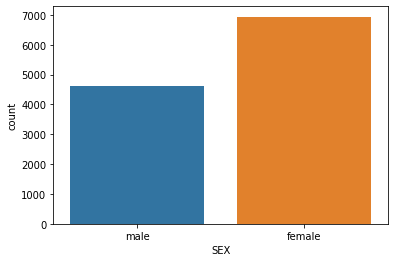

In [10]:
sns.countplot(train['SEX'])

In [11]:
prob_female = train['SEX'].value_counts('whatever mas da certo')[0]

for i in range(len(train['SEX'])):
    if sex[i] is np.nan:
        rand = np.random.rand()
    
        if rand > prob_female:
            sex[i] = 'female'
        else:
            sex[i] = 'male'
        
sex.value_counts()

female    7110
male      4890
Name: SEX, dtype: int64

In [12]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=[['male','female']])

# retirar dropna, apos imputacao
train ['SEX'] = enc.fit_transform(pd.DataFrame(sex))

## Correcao da coluna MARRIAGE

In [13]:
train['MARRIAGE'].value_counts()

single     6096
married    5270
others      125
SINGLE       64
MARRIED      47
OTHERS        3
Name: MARRIAGE, dtype: int64

In [14]:
# Padronizando todas letra para minuscula
train['MARRIAGE'] = train['MARRIAGE'].str.lower();

In [15]:
train['MARRIAGE'].isna().sum()

395

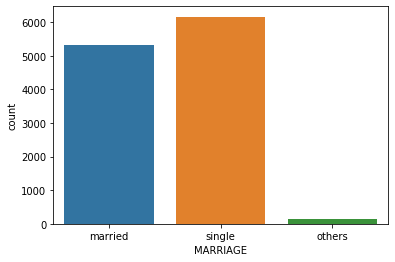

In [16]:
sns.countplot(train['MARRIAGE'])

In [17]:
prob_others = train['MARRIAGE'].value_counts('whatever mas da certo')[2]
prob_single = train['MARRIAGE'].value_counts('whatever mas da certo')[1]

marriage = train['MARRIAGE'].copy()
for i in range(len(train['MARRIAGE'])):
    if marriage[i] is np.nan:
        rand = np.random.rand()
    
        if prob_others < rand:
            marriage[i] = 'others'
        elif rand < prob_single:
            marriage[i] = 'married'
        else:
            marriage[i] = 'single'

In [18]:
enc = OrdinalEncoder(categories=[['single','married','others']])

# retirar dropna, apos imputacao
train['MARRIAGE'] = enc.fit_transform(pd.DataFrame(marriage))

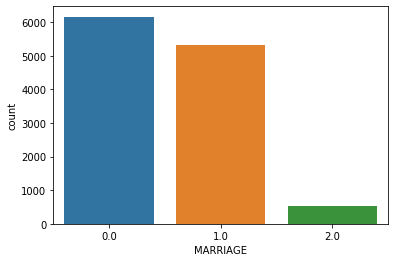

In [19]:
sns.countplot(train['MARRIAGE'])

Correcao da coluna EDUCATION

In [20]:
train['EDUCATION'].isna().sum()

513

In [21]:
train['EDUCATION'].value_counts()

university         5419
graduate school    4128
high school        1899
others               41
Name: EDUCATION, dtype: int64

In [22]:
education = train['EDUCATION'].copy()
enc = OrdinalEncoder(categories=[['graduate school','high school','university','others']])

# retirar dropna, apos imputacao
enc.fit_transform(pd.DataFrame(education.dropna()))

array([[1.],
       [2.],
       [2.],
       ...,
       [2.],
       [1.],
       [2.]])

## CORRECAO VARIAVEIS NUMERICAS

In [23]:
pay = pd.DataFrame(train.loc[:,'PAY_0':'PAY_6'])
pay.describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,11600.000000,11593.000000,11565.000000,11595.000000,11577.000000,11600.000000
mean,-0.008707,-0.131200,-0.160398,-0.217853,-0.265613,-0.287672
std,1.124775,1.186807,1.184745,1.174954,1.144540,1.163689
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000


Segundo a descricao do dataset nao deveria haver -2

In [24]:
pay.isna().sum()

PAY_0    400
PAY_2    407
PAY_3    435
PAY_4    405
PAY_5    423
PAY_6    400
dtype: int64

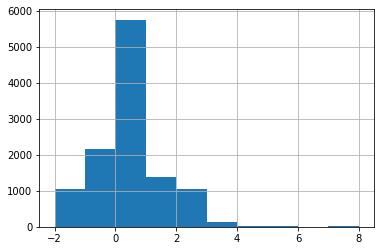

In [25]:
train['PAY_0'].hist()

## Modelo LGBMRegressor (retirando nan e variaveis categoricas)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = train_sem_nan[features].copy()
y = train_sem_nan['default.payment.next.month'].copy()
testX = test.drop(['ID','SEX','EDUCATION','MARRIAGE'], axis=1).copy()

#create the classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the classifier
classifier.fit(X, y)
# do our predictions on the test
predictions = classifier.predict(testX)
# see how good we did on the test
#accuracy_score(y_true = test['default.payment.next.month'], y_pred = predictions)

NameError: name 'train_sem_nan' is not defined

In [ ]:
testX = test.drop(['ID','SEX','EDUCATION','MARRIAGE'], axis=1).copy()
csv['ID'] = test[['ID']].copy()
csv['default.payment.next.month'] = predictions


In [ ]:
csv['default.payment.next.month'].describe()

In [ ]:
copy = csv['default.payment.next.month'].copy()
for i in range (len(testX)):
    if copy[i] < 0.15:
        copy[i] = 0
    else:
        copy[i] = 1
        
csv['default.payment.next.month'] = copy

In [ ]:
csv.to_csv('lightboost',index = False)

In [ ]:
csv['default.payment.next.month'].value_counts()

In [ ]:
csv.head()